In [1]:
#actual lab !pip install sklearn
from sklearn import tree, metrics, datasets
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

digits = datasets.load_digits()

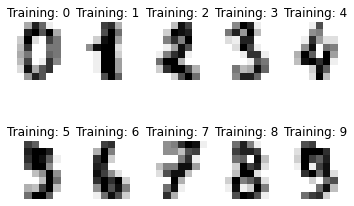

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#from graphviz import Source
#from sklearn.tree import export_graphviz

In [4]:
num_examples = len(digits.data)
num_split = int(0.7*num_examples)

train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [5]:

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier()

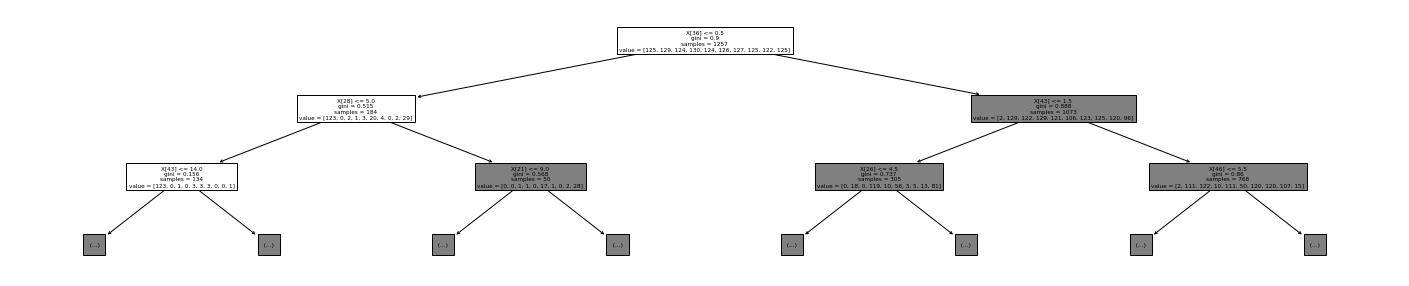

130
16


In [6]:
#plt.figure()
#tree.plot_tree(tree_clf)
#plt.show()
plt.figure(figsize=(25,5))
tree.plot_tree(tree_clf, max_depth=2)
plt.show()
print(tree_clf.get_n_leaves())
print(tree_clf.get_depth())

In [7]:
predictions = tree_clf.predict(test_features)
print("Classification report for classifier %s:\n%s\n"
      % (tree_clf, metrics.classification_report(test_labels, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predictions))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        53
           1       0.81      0.72      0.76        53
           2       0.73      0.70      0.71        53
           3       0.63      0.72      0.67        53
           4       0.83      0.86      0.84        57
           5       0.83      0.86      0.84        56
           6       0.88      0.81      0.85        54
           7       0.91      0.91      0.91        54
           8       0.77      0.63      0.69        52
           9       0.72      0.84      0.77        55

    accuracy                           0.79       540
   macro avg       0.79      0.79      0.79       540
weighted avg       0.79      0.79      0.79       540


Confusion matrix:
[[45  0  5  0  3  0  0  0  0  0]
 [ 0 38  3  4  0  0  1  0  2  5]
 [ 2  0 37  5  0  0  2  0  5  2]
 [ 0  2  2 38  0  4  0  1  2  4]
 [ 4  0  0  0 49  0  2  1  

In [9]:
tree_clf2 = DecisionTreeClassifier(criterion='entropy', 
                            max_depth = 10,min_samples_leaf = 3 )
tree_clf2.fit(train_features, train_labels)

predictions2 = tree_clf.predict(test_features)
print("Classification report for classifier %s:\n%s\n"
      % (tree_clf2, metrics.classification_report(test_labels, predictions2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predictions2))

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        53
           1       0.81      0.72      0.76        53
           2       0.73      0.70      0.71        53
           3       0.63      0.72      0.67        53
           4       0.83      0.86      0.84        57
           5       0.83      0.86      0.84        56
           6       0.88      0.81      0.85        54
           7       0.91      0.91      0.91        54
           8       0.77      0.63      0.69        52
           9       0.72      0.84      0.77        55

    accuracy                           0.79       540
   macro avg       0.79      0.79      0.79       540
weighted avg       0.79      0.79      0.79       540


Confusion matrix:
[[45  0  5  0  3  0  0  0  0  0]
 [ 0 38  3  4  0  0  1  0  2  5]
 [ 2  0 37  5  0  0  2  0  5  2]
 [ 0  2

In [62]:
from collections import Counter, OrderedDict
import math

#fixa info gain v_target antal fuffens och attributes3 uppdelning

class ID3DecisionTreeClassifier:


    def __init__(self, minSamplesLeaf = 1, minSamplesSplit = 2) :

        self.__nodeCounter = 0

        # the graph to visualise the tree
        self.__dot = Digraph(comment='The Decision Tree')
        self.root = None
        self.nodes = []
        self.att_keys = None

        # suggested attributes of the classifier to handle training parameters
        self.__minSamplesLeaf = minSamplesLeaf
        self.__minSamplesSplit = minSamplesSplit


    # Create a new node in the tree with the suggested attributes for the visualisation.
    # It can later be added to the graph with the respective function
    def new_ID3_node(self):
        node = {'id': self.__nodeCounter, 'value': None, 'label': None, 'attribute': None, 'entropy': None, 'samples': None,
                         'classCounts': None, 'nodes': [], 'split_attribute': None}
        self.nodes.append(node)
        self.__nodeCounter += 1
        return node

    # adds the node into the graph for visualisation (creates a dot-node)
    def add_node_to_graph(self, node, parentid=-1):
        nodeString = ''
        for k in node:
            if ((node[k] != None) and (k != 'nodes')):
                nodeString += "\n" + str(k) + ": " + str(node[k])

        self.__dot.node(str(node['id']), label=nodeString)
        if (parentid != -1):
            self.__dot.edge(str(parentid), str(node['id']))
            nodeString += "\n" + str(parentid) + " -> " + str(node['id'])

        print(nodeString)
        return


    # make the visualisation available
    def make_dot_data(self) :
        return self.__dot


    # For you to fill in; Suggested function to find the best attribute to split with, given the set of
    # remaining attributes, the currently evaluated data and target.
    def find_split_attr(self, entropy, data,target,attributes,classes):
        info_gain = []
        i = 0
        for a in attributes:
            info_gain.append(self.info_gain(i,entropy, data,target, attributes[a], classes))
            i+=1
        max_info_gain = max(info_gain)

 
        A = list(attributes.items())[info_gain.index(max_info_gain)][0]
        values = list(attributes.items())[info_gain.index(max_info_gain)][1]
        return A, values

    def get_entropy(self,target,classes):
        entropy = 0

        count = Counter(target)
        n = len(target)
        
        for c in classes:
            p = count[c]/n
            if p != 0:
                entropy += p * math.log(p,2)
        return - entropy

    def info_gain(self,index, entropy, data,target, attribute_vector,classes):
            entropies = []
            info_gain = 0
            for v in attribute_vector:
                v_target = []
                for i in range(len(data)):
                    if v == data[i][index]:
                        v_target.append(target[i])
                if len(v_target) > 0:
                    v_entropy = self.get_entropy(v_target,classes)
                    entropies.append(v_entropy)
                    info_gain = info_gain + (v_entropy * len(v_target) / len(data))
            return entropy - info_gain

    # the entry point for the recursive ID3-algorithm, you need to fill in the calls to your recursive implementation
    def fit(self, data, target, attributes, classes):

                #root.update({'value': 'hello', 'label': 'okok', 'attribute': None,
        #            'entropy': None, 'samples': None,'classCounts': None, 'nodes': None})
        root = self.new_ID3_node()
        self.root = root
        self.add_node_to_graph(root)
        self.att_keys = list(attributes.keys())
        print('samples ' + str(len(data)))
        tree = self.tree_rek(root,data,target,attributes,classes)
        return tree

    def tree_rek(self,node,data,target,attributes,classes):
        if  len(attributes) == 0 or len(set(target)) == 1 or len(data) == 0:
            node.update({'label': self.common_target(target,classes),'entropy': self.get_entropy(target, classes),'samples': len(data) })
            print('label: ' + str(node['label']))
            return node
        else:
            entropy = self.get_entropy(target,classes)
            A, values = self.find_split_attr(entropy, data,target,attributes,classes)
            
            node.update({'attribute': A, 'entropy':entropy,'samples':len(target), 'classCounts': Counter(target)})
            #print(node['classCounts'])
            
            #For each possible value, v, of A, add a new tree branch below Root, 
            for v in values:
                node_v = self.new_ID3_node()
                self.add_node_to_graph(node_v, node['id'])
                node['nodes'].append(node_v)
                node_v['split_attribute'] = [v, self.att_keys.index(A)]
                data_v = []
                target_v = list()
                for i in range(len(data)):
                    if v == data[i][self.att_keys.index(A)]:
                        data_v.append(data[i])
                        target_v.append(target[i])

                if len(data_v) == 0:
                    node_v.update({'label': self.common_target(target, classes),'samples':0})
                    print('leaf label: ' + str(node_v['label']))
                else:
                    attributes_v = OrderedDict(attributes)
                    attributes_v.pop(A)
                    self.tree_rek(node_v,data_v,target_v,attributes_v,classes)           
        return node
    
    
    def common_target(self, target, classes):
        # Get unique tuples from list
        if len(target) == 0:
            return classes[0]
        b = Counter(target)
        c = b.most_common(1)[0][0]
        #print(c)
        return c


    def predict(self, data, tree) :
        predicted = list()
        #predicted = list()
        for x in data:
            #print(x)
            predicted.append(self.predict_rek(self.root, x))
        return predicted

    def predict_rek(self,node,x):
        if node['label'] is not None:
            return node['label']
        elif len(node['nodes']) > 0:
            for node_v in node['nodes']:
                if node_v['split_attribute'][0] == x[node_v['split_attribute'][1]]:
                    k = self.predict_rek(node_v, x)
                    #if k is not None:
                    return k
                    #else:
                    #   return node['classCounts'].most_common(1)[0][0]
            #print(node['classCounts'])
            return node['classCounts'].most_common(1)[0][0]
        #kolla vanligaste labels för barnen till noden med None, extra attribut i nodes uppdateras i
                #tree_rek och kollas i predict_rek


            


In [63]:
import ToyData as td
import ID3

import numpy as np
from sklearn import tree, metrics, datasets



attributes, classes, data, target, data2, target2 = td.ToyData().get_data()

id3 = ID3.ID3DecisionTreeClassifier()

myTree = id3.fit(data, target, attributes, classes)

#plot = id3.make_dot_data()
#plot.render("testTree")
predicted = id3.predict(data2, myTree)
print(predicted)




id: 0
samples 16

id: 1
0 -> 1

id: 2
1 -> 2

id: 3
2 -> 3
label: +

id: 4
2 -> 4
label: -

id: 5
2 -> 5
leaf label: +

id: 6
1 -> 6
label: +

id: 7
0 -> 7

id: 8
7 -> 8

id: 9
8 -> 9
label: -

id: 10
8 -> 10
leaf label: -

id: 11
8 -> 11
leaf label: -

id: 12
7 -> 12

id: 13
12 -> 13
label: +

id: 14
12 -> 14
label: -

id: 15
12 -> 15
leaf label: -
['+', '+', '+', '-', '-']


In [64]:


print(predicted)
print(target2)



['+', '+', '+', '-', '-']
('+', '-', '+', '-', '+')


In [67]:
predictions = tree_clf.predict(test_features)
print(metrics.classification_report(target2, predicted))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target2, predicted))

              precision    recall  f1-score   support

           +       0.67      0.67      0.67         3
           -       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Confusion matrix:
[[2 1]
 [1 1]]


In [68]:
classes2 = (0, 1, 2,3,4,5,6,7,8,9)

attributes2 = OrderedDict()
for i in range(64):
        attributes2[i] = [float(j) for j in range(16)]

id3 = ID3.ID3DecisionTreeClassifier()

myTree = id3.fit(train_features, train_labels, attributes2, classes2)
predicted2 = id3.predict(test_features, myTree)


id: 0
samples 1257

id: 1
0 -> 1

id: 2
1 -> 2

id: 3
2 -> 3
label: 5

id: 4
2 -> 4
label: 5

id: 5
2 -> 5
label: 9

id: 6
2 -> 6
leaf label: 9

id: 7
2 -> 7
leaf label: 9

id: 8
2 -> 8
leaf label: 9

id: 9
2 -> 9
leaf label: 9

id: 10
2 -> 10
leaf label: 9

id: 11
2 -> 11
label: 9

id: 12
2 -> 12
leaf label: 9

id: 13
2 -> 13
label: 9

id: 14
2 -> 14
label: 9

id: 15
2 -> 15
label: 3

id: 16
2 -> 16
label: 9

id: 17
2 -> 17
label: 9

id: 18
2 -> 18
label: 9

id: 19
1 -> 19

id: 20
19 -> 20
leaf label: 9

id: 21
19 -> 21
label: 9

id: 22
19 -> 22
leaf label: 9

id: 23
19 -> 23
leaf label: 9

id: 24
19 -> 24
leaf label: 9

id: 25
19 -> 25
label: 9

id: 26
19 -> 26
label: 9

id: 27
19 -> 27
leaf label: 9

id: 28
19 -> 28
leaf label: 9

id: 29
19 -> 29
label: 5

id: 30
19 -> 30
leaf label: 9

id: 31
19 -> 31
leaf label: 9

id: 32
19 -> 32
leaf label: 9

id: 33
19 -> 33
leaf label: 9

id: 34
19 -> 34
leaf label: 9

id: 35
19 -> 35
leaf label: 9

id: 36
1 -> 36

id: 37
36 -> 37
label: 5

i

452 -> 453
leaf label: 9

id: 454
452 -> 454
leaf label: 9

id: 455
452 -> 455
leaf label: 9

id: 456
452 -> 456
leaf label: 9

id: 457
452 -> 457
leaf label: 9

id: 458
452 -> 458
leaf label: 9

id: 459
452 -> 459
leaf label: 9

id: 460
452 -> 460
label: 9

id: 461
452 -> 461
leaf label: 9

id: 462
452 -> 462
leaf label: 9

id: 463
452 -> 463
leaf label: 9

id: 464
452 -> 464
leaf label: 9

id: 465
452 -> 465
leaf label: 9

id: 466
452 -> 466
leaf label: 9

id: 467
452 -> 467
label: 3

id: 468
452 -> 468
leaf label: 9

id: 469
389 -> 469

id: 470
469 -> 470
label: 9

id: 471
469 -> 471
leaf label: 9

id: 472
469 -> 472
label: 2

id: 473
469 -> 473
leaf label: 9

id: 474
469 -> 474
leaf label: 9

id: 475
469 -> 475
leaf label: 9

id: 476
469 -> 476
leaf label: 9

id: 477
469 -> 477
leaf label: 9

id: 478
469 -> 478
leaf label: 9

id: 479
469 -> 479
leaf label: 9

id: 480
469 -> 480
leaf label: 9

id: 481
469 -> 481
leaf label: 9

id: 482
469 -> 482
leaf label: 9

id: 483
469 -> 483
lea


id: 843
842 -> 843

id: 844
843 -> 844
leaf label: 3

id: 845
843 -> 845
leaf label: 3

id: 846
843 -> 846
label: 7

id: 847
843 -> 847
leaf label: 3

id: 848
843 -> 848
label: 3

id: 849
843 -> 849
leaf label: 3

id: 850
843 -> 850
leaf label: 3

id: 851
843 -> 851
leaf label: 3

id: 852
843 -> 852
leaf label: 3

id: 853
843 -> 853
label: 3

id: 854
843 -> 854
label: 3

id: 855
843 -> 855
leaf label: 3

id: 856
843 -> 856
leaf label: 3

id: 857
843 -> 857
leaf label: 3

id: 858
843 -> 858
leaf label: 3

id: 859
843 -> 859
leaf label: 3

id: 860
842 -> 860
label: 3

id: 861
842 -> 861

id: 862
861 -> 862
label: 4

id: 863
861 -> 863
leaf label: 4

id: 864
861 -> 864
leaf label: 4

id: 865
861 -> 865
label: 5

id: 866
861 -> 866
leaf label: 4

id: 867
861 -> 867
leaf label: 4

id: 868
861 -> 868
leaf label: 4

id: 869
861 -> 869
leaf label: 4

id: 870
861 -> 870
leaf label: 4

id: 871
861 -> 871
leaf label: 4

id: 872
861 -> 872
leaf label: 4

id: 873
861 -> 873
leaf label: 4

id: 874



id: 1235
1234 -> 1235
label: 6

id: 1236
1234 -> 1236
leaf label: 3

id: 1237
1234 -> 1237
leaf label: 3

id: 1238
1234 -> 1238
label: 3

id: 1239
1234 -> 1239
leaf label: 3

id: 1240
1234 -> 1240
leaf label: 3

id: 1241
1234 -> 1241
leaf label: 3

id: 1242
1234 -> 1242
leaf label: 3

id: 1243
1234 -> 1243
leaf label: 3

id: 1244
1234 -> 1244
leaf label: 3

id: 1245
1234 -> 1245
leaf label: 3

id: 1246
1234 -> 1246
leaf label: 3

id: 1247
1234 -> 1247
leaf label: 3

id: 1248
1234 -> 1248
leaf label: 3

id: 1249
1234 -> 1249
leaf label: 3

id: 1250
1234 -> 1250
leaf label: 3

id: 1251
1197 -> 1251

id: 1252
1251 -> 1252
leaf label: 4

id: 1253
1251 -> 1253
leaf label: 4

id: 1254
1251 -> 1254
leaf label: 4

id: 1255
1251 -> 1255
leaf label: 4

id: 1256
1251 -> 1256
label: 4

id: 1257
1251 -> 1257
leaf label: 4

id: 1258
1251 -> 1258
leaf label: 4

id: 1259
1251 -> 1259
label: 6

id: 1260
1251 -> 1260
leaf label: 4

id: 1261
1251 -> 1261
leaf label: 4

id: 1262
1251 -> 1262
label: 4

id

1566 -> 1570
leaf label: 3

id: 1571
1566 -> 1571
leaf label: 3

id: 1572
1566 -> 1572
label: 3

id: 1573
1566 -> 1573
leaf label: 3

id: 1574
1566 -> 1574
label: 7

id: 1575
1566 -> 1575
label: 3

id: 1576
1566 -> 1576
leaf label: 3

id: 1577
1566 -> 1577
leaf label: 3

id: 1578
1566 -> 1578
leaf label: 3

id: 1579
1566 -> 1579
label: 2

id: 1580
1566 -> 1580
label: 5

id: 1581
1566 -> 1581
leaf label: 3

id: 1582
1566 -> 1582
leaf label: 3

id: 1583
0 -> 1583

id: 1584
1583 -> 1584

id: 1585
1584 -> 1585
label: 4

id: 1586
1584 -> 1586
label: 3

id: 1587
1584 -> 1587
leaf label: 2

id: 1588
1584 -> 1588
label: 9

id: 1589
1584 -> 1589
leaf label: 2

id: 1590
1584 -> 1590
leaf label: 2

id: 1591
1584 -> 1591
leaf label: 2

id: 1592
1584 -> 1592
label: 2

id: 1593
1584 -> 1593
leaf label: 2

id: 1594
1584 -> 1594
label: 2

id: 1595
1584 -> 1595
label: 2

id: 1596
1584 -> 1596
leaf label: 2

id: 1597
1584 -> 1597
leaf label: 2

id: 1598
1584 -> 1598
label: 2

id: 1599
1584 -> 1599
label

1989 -> 1990
leaf label: 8

id: 1991
1989 -> 1991
label: 3

id: 1992
1989 -> 1992
leaf label: 8

id: 1993
1989 -> 1993
leaf label: 8

id: 1994
1989 -> 1994
leaf label: 8

id: 1995
1989 -> 1995
leaf label: 8

id: 1996
1989 -> 1996
leaf label: 8

id: 1997
1989 -> 1997
label: 8

id: 1998
1989 -> 1998
leaf label: 8

id: 1999
1989 -> 1999
leaf label: 8

id: 2000
1989 -> 2000
leaf label: 8

id: 2001
1989 -> 2001
leaf label: 8

id: 2002
1989 -> 2002
leaf label: 8

id: 2003
1989 -> 2003
leaf label: 8

id: 2004
1989 -> 2004
leaf label: 8

id: 2005
1989 -> 2005
leaf label: 8

id: 2006
1824 -> 2006

id: 2007
2006 -> 2007
leaf label: 3

id: 2008
2006 -> 2008
label: 5

id: 2009
2006 -> 2009
leaf label: 3

id: 2010
2006 -> 2010
label: 3

id: 2011
2006 -> 2011
leaf label: 3

id: 2012
2006 -> 2012
leaf label: 3

id: 2013
2006 -> 2013
leaf label: 3

id: 2014
2006 -> 2014
leaf label: 3

id: 2015
2006 -> 2015
leaf label: 3

id: 2016
2006 -> 2016
leaf label: 3

id: 2017
2006 -> 2017
leaf label: 3

id: 201

In [69]:
print(metrics.classification_report(test_labels, predicted2))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted2))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89        53
           1       0.16      0.08      0.10        53
           2       0.21      0.15      0.18        53
           3       0.13      0.49      0.21        53
           4       0.26      0.16      0.20        57
           5       0.36      0.09      0.14        56
           6       0.28      0.28      0.28        54
           7       0.41      0.17      0.24        54
           8       0.28      0.15      0.20        52
           9       0.54      0.65      0.59        55

    accuracy                           0.31       540
   macro avg       0.35      0.31      0.30       540
weighted avg       0.35      0.31      0.30       540

Confusion matrix:
[[49  0  0  0  0  2  0  0  0  2]
 [ 0  4  1 30  4  1  5  2  2  4]
 [ 0  5  8 17  3  0  9  1  2  8]
 [ 0  3  6 26  4  0  4  0  6  4]
 [ 3  1  2 22  9  1  7  7  1  4]
 [ 3  6  7 11  5  5 10  2  2  5]
 [ 1  1  5 22  3  0 15  1

In [70]:
for n in digits.data:
    for i in range( len(n)):
        if n[i] <= 5:
            n[i] = 5
        elif n[i] > 5 and i <= 11:
            n[i] = 11
        else:
            n[i] = 16
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

attributes3 = OrderedDict()
for i in range(64):
    attributes3[i] = [5,11,16]


In [71]:
id3 = ID3.ID3DecisionTreeClassifier()

myTree = id3.fit(train_features, train_labels, attributes3, classes2)
predicted3 = id3.predict(test_features, myTree)


id: 0
samples 1257

id: 1
0 -> 1

id: 2
1 -> 2

id: 3
2 -> 3

id: 4
3 -> 4

id: 5
4 -> 5

id: 6
5 -> 6

id: 7
6 -> 7

id: 8
7 -> 8

id: 9
8 -> 9
label: 3

id: 10
8 -> 10
leaf label: 3

id: 11
8 -> 11

id: 12
11 -> 12

id: 13
12 -> 13
label: 3

id: 14
12 -> 14

id: 15
14 -> 15

id: 16
15 -> 16

id: 17
16 -> 17

id: 18
17 -> 18

id: 19
18 -> 19

id: 20
19 -> 20
leaf label: 9

id: 21
19 -> 21

id: 22
21 -> 22
label: 9

id: 23
21 -> 23
label: 2

id: 24
21 -> 24
leaf label: 9

id: 25
19 -> 25
leaf label: 9

id: 26
18 -> 26
leaf label: 9

id: 27
18 -> 27
leaf label: 9

id: 28
17 -> 28
leaf label: 9

id: 29
17 -> 29
leaf label: 9

id: 30
16 -> 30
leaf label: 9

id: 31
16 -> 31
leaf label: 9

id: 32
15 -> 32
leaf label: 9

id: 33
15 -> 33
leaf label: 9

id: 34
14 -> 34
leaf label: 9

id: 35
14 -> 35
leaf label: 9

id: 36
12 -> 36
leaf label: 3

id: 37
11 -> 37
leaf label: 3

id: 38
11 -> 38

id: 39
38 -> 39

id: 40
39 -> 40
label: 9

id: 41
39 -> 41
label: 3

id: 42
39 -> 42
leaf label: 3

id


id: 635
634 -> 635

id: 636
635 -> 636
leaf label: 8

id: 637
635 -> 637
leaf label: 8

id: 638
635 -> 638

id: 639
638 -> 639

id: 640
639 -> 640

id: 641
640 -> 641

id: 642
641 -> 642

id: 643
642 -> 643

id: 644
643 -> 644

id: 645
644 -> 645
label: 8

id: 646
644 -> 646
leaf label: 8

id: 647
644 -> 647
label: 9

id: 648
643 -> 648
leaf label: 8

id: 649
643 -> 649
leaf label: 8

id: 650
642 -> 650
leaf label: 8

id: 651
642 -> 651
leaf label: 8

id: 652
641 -> 652
leaf label: 8

id: 653
641 -> 653
leaf label: 8

id: 654
640 -> 654
leaf label: 8

id: 655
640 -> 655
leaf label: 8

id: 656
639 -> 656
leaf label: 8

id: 657
639 -> 657
leaf label: 8

id: 658
638 -> 658
leaf label: 8

id: 659
638 -> 659
leaf label: 8

id: 660
634 -> 660
leaf label: 8

id: 661
634 -> 661
label: 8

id: 662
632 -> 662
leaf label: 8

id: 663
631 -> 663
leaf label: 8

id: 664
631 -> 664
leaf label: 8

id: 665
630 -> 665
leaf label: 8

id: 666
630 -> 666
leaf label: 8

id: 667
629 -> 667
leaf label: 8

id: 


id: 947
946 -> 947

id: 948
947 -> 948

id: 949
948 -> 949

id: 950
949 -> 950

id: 951
950 -> 951

id: 952
951 -> 952

id: 953
952 -> 953

id: 954
953 -> 954
label: 5

id: 955
953 -> 955
leaf label: 5

id: 956
953 -> 956

id: 957
956 -> 957
label: 8

id: 958
956 -> 958
leaf label: 5

id: 959
956 -> 959

id: 960
959 -> 960

id: 961
960 -> 961
label: 6

id: 962
960 -> 962
label: 5

id: 963
960 -> 963
leaf label: 5

id: 964
959 -> 964
leaf label: 5

id: 965
959 -> 965

id: 966
965 -> 966

id: 967
966 -> 967
label: 8

id: 968
966 -> 968
leaf label: 8

id: 969
966 -> 969
label: 9

id: 970
965 -> 970
leaf label: 5

id: 971
965 -> 971
label: 5

id: 972
952 -> 972
leaf label: 5

id: 973
952 -> 973

id: 974
973 -> 974
label: 4

id: 975
973 -> 975
label: 5

id: 976
973 -> 976
leaf label: 5

id: 977
951 -> 977
leaf label: 5

id: 978
951 -> 978
leaf label: 5

id: 979
950 -> 979
leaf label: 5

id: 980
950 -> 980
leaf label: 5

id: 981
949 -> 981
leaf label: 5

id: 982
949 -> 982

id: 983
982 -> 9


id: 1238
1237 -> 1238
leaf label: 4

id: 1239
1237 -> 1239
leaf label: 4

id: 1240
1237 -> 1240

id: 1241
1240 -> 1241
label: 4

id: 1242
1240 -> 1242
leaf label: 4

id: 1243
1240 -> 1243

id: 1244
1243 -> 1244
leaf label: 8

id: 1245
1243 -> 1245

id: 1246
1245 -> 1246
label: 8

id: 1247
1245 -> 1247
label: 4

id: 1248
1245 -> 1248
leaf label: 8

id: 1249
1243 -> 1249
leaf label: 8

id: 1250
1236 -> 1250
leaf label: 4

id: 1251
1236 -> 1251
label: 4

id: 1252
1235 -> 1252
leaf label: 4

id: 1253
1235 -> 1253

id: 1254
1253 -> 1254
label: 4

id: 1255
1253 -> 1255
leaf label: 0

id: 1256
1253 -> 1256
label: 0

id: 1257
1231 -> 1257
leaf label: 4

id: 1258
1231 -> 1258
label: 4

id: 1259
1230 -> 1259
label: 7

id: 1260
1230 -> 1260
leaf label: 4

id: 1261
1229 -> 1261

id: 1262
1261 -> 1262
leaf label: 7

id: 1263
1261 -> 1263

id: 1264
1263 -> 1264
leaf label: 7

id: 1265
1263 -> 1265
leaf label: 7

id: 1266
1263 -> 1266

id: 1267
1266 -> 1267

id: 1268
1267 -> 1268

id: 1269
1268 -> 1


id: 1760
1759 -> 1760

id: 1761
1760 -> 1761
label: 6

id: 1762
1760 -> 1762
leaf label: 6

id: 1763
1760 -> 1763
label: 8

id: 1764
1759 -> 1764
leaf label: 2

id: 1765
1759 -> 1765
label: 2

id: 1766
1494 -> 1766
leaf label: 8

id: 1767
1494 -> 1767

id: 1768
1767 -> 1768
label: 8

id: 1769
1767 -> 1769
label: 2

id: 1770
1767 -> 1770
leaf label: 2

id: 1771
1493 -> 1771
leaf label: 8

id: 1772
1493 -> 1772
leaf label: 8

id: 1773
1492 -> 1773
leaf label: 8

id: 1774
1492 -> 1774
leaf label: 8

id: 1775
945 -> 1775
leaf label: 2

id: 1776
945 -> 1776

id: 1777
1776 -> 1777

id: 1778
1777 -> 1778

id: 1779
1778 -> 1779

id: 1780
1779 -> 1780

id: 1781
1780 -> 1781
label: 2

id: 1782
1780 -> 1782
leaf label: 2

id: 1783
1780 -> 1783

id: 1784
1783 -> 1784
leaf label: 1

id: 1785
1783 -> 1785
leaf label: 1

id: 1786
1783 -> 1786

id: 1787
1786 -> 1787
label: 1

id: 1788
1786 -> 1788
leaf label: 1

id: 1789
1786 -> 1789

id: 1790
1789 -> 1790
label: 1

id: 1791
1789 -> 1791
label: 6

id

In [72]:
print(metrics.classification_report(test_labels, predicted3))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted3))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        53
           1       0.61      0.75      0.67        53
           2       0.82      0.70      0.76        53
           3       0.72      0.72      0.72        53
           4       0.75      0.86      0.80        57
           5       0.90      0.84      0.87        56
           6       0.79      0.91      0.84        54
           7       0.82      0.85      0.84        54
           8       0.60      0.40      0.48        52
           9       0.75      0.78      0.77        55

    accuracy                           0.77       540
   macro avg       0.77      0.77      0.77       540
weighted avg       0.77      0.77      0.77       540

Confusion matrix:
[[46  0  0  0  1  1  4  1  0  0]
 [ 0 40  1  2  2  1  0  0  2  5]
 [ 0  0 37  4  0  0  3  1  5  3]
 [ 0  2  1 38  4  1  1  2  2  2]
 [ 2  0  0  0 49  0  3  2  1  0]
 [ 0  0  0  1  5 47  1  1  1  0]
 [ 1  1  2  0  0  0 49  0